In [1]:
import os
from skimage.io import imread
from skimage.transform import resize, rescale
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from skimage import color
from skimage.feature import hog
import numpy as np
import pandas as pd

# 2. Définissez une fonction pour lire, redimensionner et stocker les données dans un dictionnaire,

In [2]:

width = 80
height = 80

monRepertoire = "data/"
pklname = "pickle_f/"

data = dict()
data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
data['label'] = []
data['filename'] = []
data['data'] = []
J = []


def resize_all(monRepertoire, pklname, width, height):
    pklname = f"{pklname}_{width}x{height}px.pkl"
    for path in os.listdir(monRepertoire):
        #data['label'].append(path[:-4])
        chemin = os.path.join(monRepertoire, path)
        #print(chemin)
        contenu=os.listdir(chemin)
        #print(contenu)
        for j in contenu:
            if '.jpg' in j or '.png' in j:
                data['label'].append(chemin[5:-4])
                image = imread(os.path.join(chemin, j))
                image = resize(image, (width, height))
                data['data'].append(image)    
                J.append(j)
            data['filename'] = J


    joblib.dump(data, pklname)

In [3]:
resize_all(monRepertoire, pklname, width=80, height=80)

# 3. Créer le jeu de données en vous servant de votre fonction précédemment créée avec 8 classes et width et height à 80 pixels

In [7]:
resize_all(monRepertoire, pklname='Animaux_Images', width=80, height=80)

# 4. Analysez le nouveau jeu de données fraîchement créé

In [8]:
from collections import Counter
 
data = joblib.load(f'{pklname}_{width}x{width}px.pkl')
 
print("nombre d’échantillons: ", len(data['data']))
print("les clés du dictionnaire data: ", list(data.keys()))
print("description: ", data['description'])
print("taille des images: " ,data['data'][1].shape)
print("le nom de chaque classe(catégorie d'animaux):", np.unique(data['label']))
print("nombre de labels(classes): ", len(np.unique(data['label'])))

nombre d’échantillons:  797
les clés du dictionnaire data:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
taille des images:  (80, 80, 3)
le nom de chaque classe(catégorie d'animaux): ['Bear' 'Duck' 'Eagle' 'Elephant' 'Lion' 'Rabbit' 'Sheep' 'Wolf']
nombre de labels(classes):  8


In [9]:
unique, counts = np.unique(data['label'],  return_counts=True)
dic_count = {k:val for k,val in zip(unique, counts)}
image_count = pd.DataFrame.from_dict(dic_count, orient='index', columns=['count'])
image_count

,count
Bear,101
Duck,102
Eagle,97
Elephant,100
Lion,97
Rabbit,100
Sheep,100
Wolf,100


### une autre façon pour compter le nombre d'image par label en utilisant counter() 

In [10]:
Counter(data['label'])

Counter({'Elephant': 100,
         'Duck': 102,
         'Lion': 97,
         'Sheep': 100,
         'Bear': 101,
         'Rabbit': 100,
         'Wolf': 100,
         'Eagle': 97})

Text(0.5, 1.0, 'Rabbit')

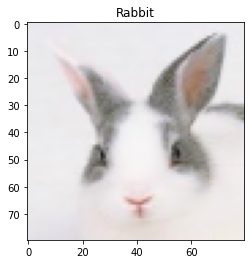

In [11]:

plt.imshow(data['data'][545])
plt.title(data['label'][545])

# 5. Affichez un exemple de chaque animal inclus dans le jeu de données

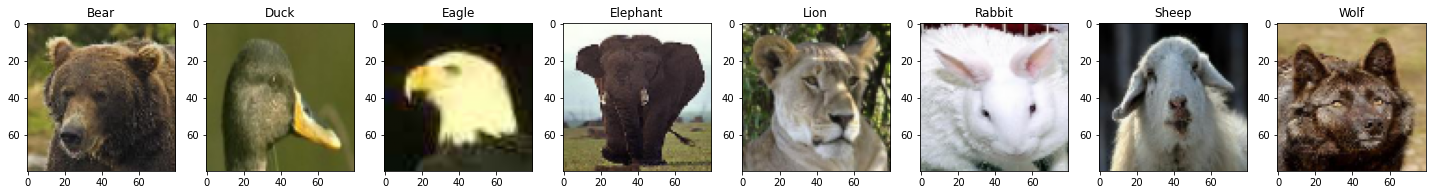

In [12]:
rows = 1
cols = 8
axes=[]
fig=plt.figure()
fig.set_size_inches(20,4)
I = []
for k,v in zip(np.unique(data['label']), data['data']):
    ind = data['label'].index(k)
    I.append(ind+4)# je choisie de prendre l'index de la 5ème image
    #print(I)
for a,i in zip(range(rows*cols), I):
    axes.append(fig.add_subplot(rows, cols, a+1))
    subplot_title=(data['label'][i])
    axes[-1].set_title(subplot_title)  
    plt.imshow(data['data'][i])
fig.tight_layout()    
plt.show()

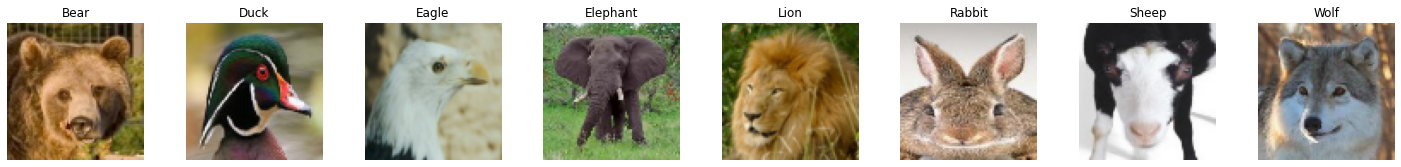

In [13]:
# une autre façon d'afficher les images(tuto)
y = np.unique(data['label'])
# configurer la figure et les axes matplotlib, en fonction du nombre de label ici on a 8 labels
fig, axes = plt.subplots(1, len(y))
fig.set_size_inches(20,4)
fig.tight_layout()
 
# index(x) Retourne la position du premier élément de la liste ayant la valeur x ici x = lab.
for ax, lab in zip(axes, y):
    idx = data['label'].index(lab)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(lab)


#### comparer les images en utilisant rgb2gray et HOG

Text(0.5, 1.0, 'image n°796 + HOG')

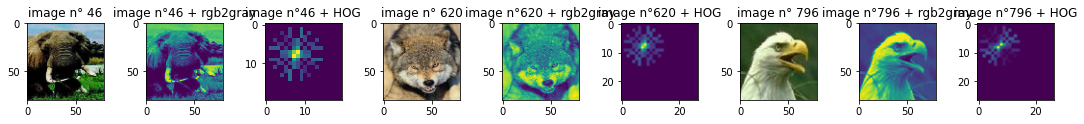

In [14]:
fig, ax = plt.subplots(1,9)
fig.set_size_inches(15,4)
fig.tight_layout()
# dataset simple
# afficher la 46 ème image du dataset
ax[0].imshow(data['data'][46])
ax[0].set_title('image n° 46')
ax[3].imshow(data['data'][620])
ax[3].set_title('image n° 620')
ax[6].imshow(data['data'][796])
ax[6].set_title('image n° 796')
# dataset + rgb2gray
data_gray = [ color.rgb2gray(i) for i in data['data']]
ax[1].imshow(data_gray[46])
ax[1].set_title('image n°46 + rgb2gray')
ax[4].imshow(data_gray[620])
ax[4].set_title('image n°620 + rgb2gray')
ax[7].imshow(data_gray[796])
ax[7].set_title('image n°796 + rgb2gray')

# dataset + HOG
ppc = 16
hog_images = []
hog_features = []
image = data_gray[46]
image = rescale(image, 0.25, anti_aliasing=False)#, 1/3, mode='reflect')
fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2), visualize=True,block_norm= 'L2')
hog_images.append(hog_image)
hog_features.append(fd)
ax[2].imshow(hog_image,)#cmap=plt.cm.gray)
ax[2].set_title('image n°46 + HOG')

image = data_gray[620]
image = rescale(image, 1/3, mode='reflect')
fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2), visualize=True,block_norm= 'L2')
hog_images.append(hog_image)
hog_features.append(fd)
ax[5].imshow(hog_image)
ax[5].set_title('image n°620 + HOG')

image = data_gray[796]
image = rescale(image, 1/3, mode='reflect')
fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2), visualize=True,block_norm= 'L2')
hog_images.append(hog_image)
hog_features.append(fd)
ax[8].imshow(hog_image)
ax[8].set_title('image n°796 + HOG')


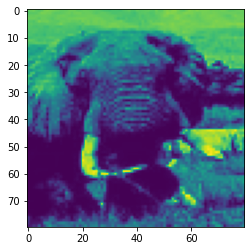

In [15]:
data_gray = [ color.rgb2gray(i) for i in data['data']]
plt.imshow(data_gray[46])

Text(0.5, 1.0, 'image n° 620')

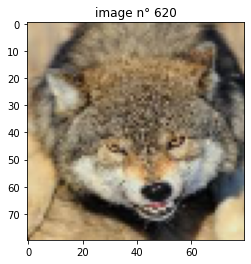

In [16]:
plt.imshow(data['data'][620])
plt.title('image n° 620')

Text(0.5, 1.0, 'image n° 620')

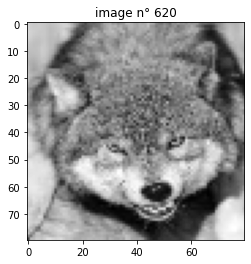

In [17]:
plt.imshow(data_gray[620], cmap=plt.cm.gray)
plt.title('image n° 620')

# 6. Diviser vos données en un ensemble de test et un ensemble de train avec la fonction train_test_split de scikit-learn (80% de l'ensemble total pour l'entraînement et le reste pour l'ensemble de test).

In [18]:
X = np.array(data['data'])
y = np.array(data['label'])

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)

# 7. Vérifier que la distribution des photos dans l'ensemble de formation et de test est similaire, (examiner le nombre relatif de photos par catégorie).

In [20]:
print("nombre d'image dans le dataset = ", len(data['data']))
print("nombre d'image dans le trainset = ", len(X_train))
print("nombre d'image dans le testset = ", len(X_test))

nombre d'image dans le dataset =  797
nombre d'image dans le trainset =  637
nombre d'image dans le testset =  160


In [21]:
l = {'y_train': y_train, 'y_test': y_test}

for k,v in l.items():
    c = Counter(v)
    count_class = len(c)
    print("Pour {} il y a {} classes qui sont : {}".format(k,count_class,c))

#print(Counter(y_train).keys())
#print(Counter(y_train).values())

Pour y_train il y a 8 classes qui sont : Counter({'Duck': 89, 'Bear': 88, 'Rabbit': 78, 'Lion': 77, 'Sheep': 77, 'Wolf': 76, 'Elephant': 76, 'Eagle': 76})
Pour y_test il y a 8 classes qui sont : Counter({'Wolf': 24, 'Elephant': 24, 'Sheep': 23, 'Rabbit': 22, 'Eagle': 21, 'Lion': 20, 'Bear': 13, 'Duck': 13})


In [22]:
dic_count = {k:val for k,val in zip(Counter(y_train).keys(), Counter(y_train).values())}
DF1 = pd.DataFrame.from_dict(dic_count, orient = 'index' ,columns=['count_y_train'])

dic_count = {k:val for k,val in zip(Counter(y_test).keys(), Counter(y_test).values())}
DF2 = pd.DataFrame.from_dict(dic_count, orient = 'index' ,columns=['count_y_test'])
DF  =pd.concat([DF1,DF2], axis = 1)
DF

,count_y_train,count_y_test
Lion,77,20
Wolf,76,24
Sheep,77,23
Elephant,76,24
Duck,89,13
Bear,88,13
Eagle,76,21
Rabbit,78,22


In [23]:
from statistics import *
DF['diff']  = [i-j for i,j in zip(DF['count_y_train'], DF['count_y_test'])]
DF

,count_y_train,count_y_test,diff
Lion,77,20,57
Wolf,76,24,52
Sheep,77,23,54
Elephant,76,24,52
Duck,89,13,76
Bear,88,13,75
Eagle,76,21,55
Rabbit,78,22,56


In [24]:
print("la moyenne de la colonne count_y_train = ",DF.count_y_train.mean())
print("la moyenne de la colonne count_y_test = ",DF.count_y_test.mean())
print("la variance de la colonne count_y_train = ",DF.count_y_train.var())
print("la moyenne de la colonne count_y_test = ",DF.count_y_test.var())

la moyenne de la colonne count_y_train =  79.625
la moyenne de la colonne count_y_test =  20.0
la variance de la colonne count_y_train =  30.553571428571427
la moyenne de la colonne count_y_test =  20.571428571428573


In [25]:
# calculer la variance pour voir la dispersion des images
DF['diff'].var()

99.125

plus une variance est élévée plus la dispersion des observations est importante 

[0 1 2 3 4 5 6 7]


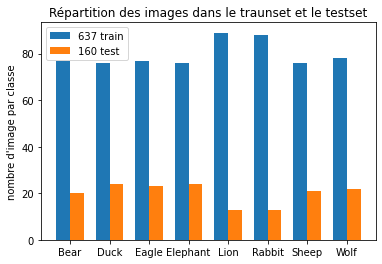

In [26]:
width = 0.35 
x = np.arange(len(np.unique(data['label']))) 
print(x)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, DF.count_y_train, width, label='{} train'.format(DF['count_y_train'].sum()))
rects2 = ax.bar(x + width/2, DF.count_y_test, width, label='{} test'.format(DF['count_y_test'].sum()))

ax.set_ylabel("nombre d'image par classe")
ax.set_title('Répartition des images dans le traunset et le testset')
ax.set_xticks(x)
ax.set_xticklabels(np.unique(data['label']))
ax.legend()

plt.show()

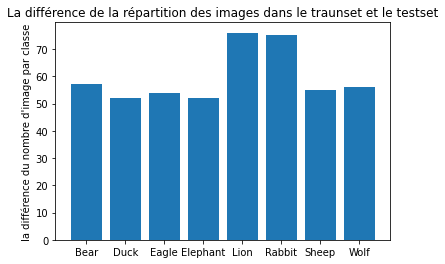

In [27]:
x = np.arange(len(np.unique(data['label']))) 
fig, ax = plt.subplots()

plt.bar(x, DF['diff'])
ax.set_ylabel("la différence du nombre d'image par classe")
ax.set_title('La différence de la répartition des images dans le traunset et le testset')
ax.set_xticks(x)
ax.set_xticklabels(np.unique(data['label']))
plt.show()

On remarque que les classes sont bien repartie entre le trainset et testset, on retrouve les 8 classes   
                  ['Bear' 'Cat' 'Cow' 'Deer' 'Duck' 'Eagle' 'Panda' 'Wolf']

On remarque qu'on a bien fractionné le dataset en 80% trainset et 20% testset.  
Une autre façon de fractionner le dataset : 
Pour chaque classes on fait : 
- faire un shuffle sur les données
- prendre 80% des données  de la classe les mettres dans une variable ex : x_train
- prendre ce qui reste des données et les mettres dans une variable ex : x_test
- faire la même chose avec les label (y-train, y_test)
puis concatener tous les x_train et les y_train, la meme chose pour le testset

On pourra utiliser le paramètre stratify de  train_test_split  pour garantir des distributions égales dans l'ensemble d'apprentissage et de test.

In [28]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, stratify = y, random_state=42)

In [29]:
l = {'y_train': y_train, 'y_test': y_test}

for k,v in l.items():
    c = Counter(v)
    count_class = len(c)
    print("Pour {} il y a {} classes qui sont : {}".format(k,count_class,c))


Pour y_train il y a 8 classes qui sont : Counter({'Bear': 81, 'Duck': 81, 'Sheep': 80, 'Wolf': 80, 'Rabbit': 80, 'Elephant': 80, 'Lion': 78, 'Eagle': 77})
Pour y_test il y a 8 classes qui sont : Counter({'Duck': 21, 'Eagle': 20, 'Sheep': 20, 'Elephant': 20, 'Rabbit': 20, 'Wolf': 20, 'Bear': 20, 'Lion': 19})


In [30]:
dic_count = {k:val for k,val in zip(Counter(y_train).keys(), Counter(y_train).values())}
DFF1 = pd.DataFrame.from_dict(dic_count, orient = 'index' ,columns=['count_y_train'])

dic_count = {k:val for k,val in zip(Counter(y_test).keys(), Counter(y_test).values())}
DFF2 = pd.DataFrame.from_dict(dic_count, orient = 'index' ,columns=['count_y_test'])
DFF  =pd.concat([DFF1,DFF2], axis = 1)
DFF

,count_y_train,count_y_test
Sheep,80,20
Eagle,77,20
Lion,78,19
Bear,81,20
Duck,81,21
Wolf,80,20
Rabbit,80,20
Elephant,80,20


In [31]:
from statistics import *
DFF['diff']  = [i-j for i,j in zip(DFF['count_y_train'], DFF['count_y_test'])]
DFF

,count_y_train,count_y_test,diff
Sheep,80,20,60
Eagle,77,20,57
Lion,78,19,59
Bear,81,20,61
Duck,81,21,60
Wolf,80,20,60
Rabbit,80,20,60
Elephant,80,20,60


In [32]:
print("la moyenne de la colonne count_y_train = ",DFF.count_y_train.mean())
print("la moyenne de la colonne count_y_test = ",DFF.count_y_test.mean())
print("la variance de la colonne count_y_train = ",DFF.count_y_train.var())
print("la moyenne de la colonne count_y_test = ",DFF.count_y_test.var())

la moyenne de la colonne count_y_train =  79.625
la moyenne de la colonne count_y_test =  20.0
la variance de la colonne count_y_train =  1.9821428571428572
la moyenne de la colonne count_y_test =  0.2857142857142857


In [33]:
# calculer la variance pour voir la dispersion des images
DFF['diff'].var()

1.4107142857142858

[0 1 2 3 4 5 6 7]


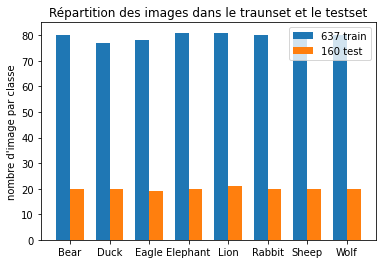

In [34]:
width = 0.35 
x = np.arange(len(np.unique(data['label']))) 
print(x)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, DFF.count_y_train, width, label='{} train'.format(DFF['count_y_train'].sum()))
rects2 = ax.bar(x + width/2, DFF.count_y_test, width, label='{} test'.format(DFF['count_y_test'].sum()))

ax.set_ylabel("nombre d'image par classe")
ax.set_title('Répartition des images dans le traunset et le testset')
ax.set_xticks(x)
ax.set_xticklabels(np.unique(data['label']))
ax.legend()

plt.show()

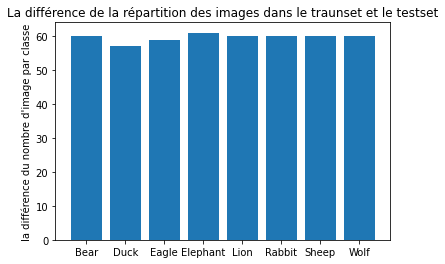

In [35]:
x = np.arange(len(np.unique(data['label']))) 
fig, ax = plt.subplots()

plt.bar(x, DFF['diff'])
ax.set_ylabel("la différence du nombre d'image par classe")
ax.set_title('La différence de la répartition des images dans le traunset et le testset')
ax.set_xticks(x)
ax.set_xticklabels(np.unique(data['label']))
plt.show()

On remarque que les la distributions des images est meilleurs

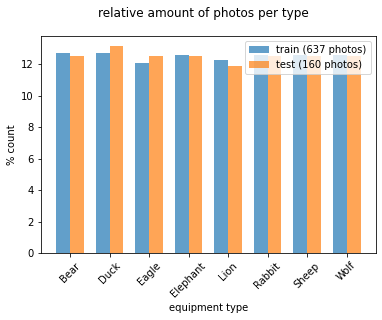

In [36]:
#exemple TUTO
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

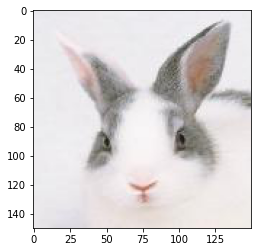

In [37]:
rabbit = imread('data/RabbitHead/rabbitfrontalfrontal0008.jpg')
plt.imshow(rabbit)

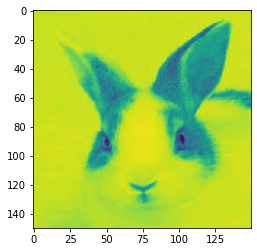

In [38]:
rabbit_gray = imread('data/RabbitHead/rabbitfrontalfrontal0008.jpg', as_gray=True)
plt.imshow(rabbit_gray)

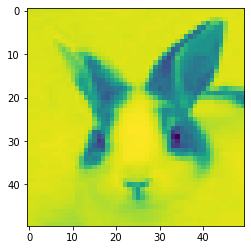

In [39]:
rabbit_gray_reflet = rescale(rabbit_gray, 1/3, mode='reflect')
plt.imshow(rabbit_gray_reflet)

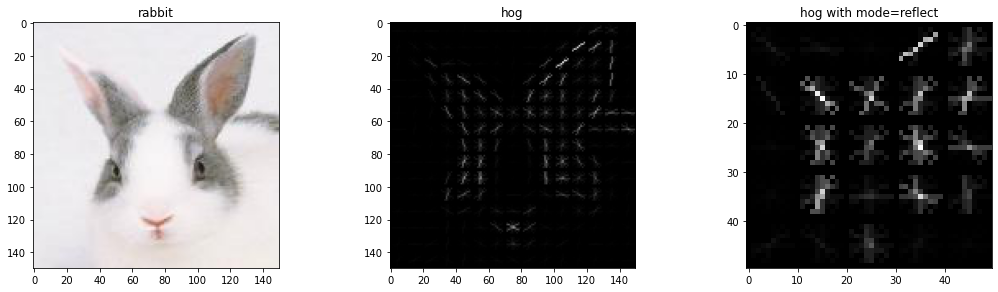

In [40]:
ppc = 10
rabbit_hog, rabbit_hog_img = hog(rabbit_gray, pixels_per_cell=(ppc,ppc), cells_per_block=(2, 2), orientations=9, visualize=True
                                 , block_norm='L2-Hys')
rabbit_hog_reflet, rabbit_hog_img_reflet = hog(rabbit_gray_reflet, pixels_per_cell=(ppc,ppc), cells_per_block=(2, 2), orientations=9, visualize=True
                                 , block_norm='L2-Hys')

fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,4)
fig.tight_layout()
ax[0].imshow(rabbit, cmap='gray')
ax[0].set_title('rabbit')
ax[1].imshow(rabbit_hog_img, cmap='gray')
ax[1].set_title('hog')
ax[2].imshow(rabbit_hog_img_reflet, cmap='gray')
ax[2].set_title('hog with mode=reflect')
plt.show()


(318, 260)
(106, 87)


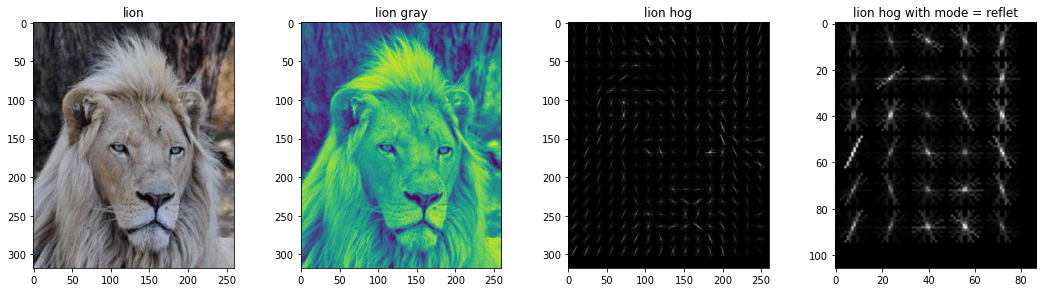

In [41]:
ppc = 16
lion = imread('data/LionHead/lion.l98.jpg')
lion_gray = imread('data/LionHead/lion.l98.jpg', as_gray=True)
lion_gray_reflet = rescale(lion_gray, 1/3, mode='reflect')

lion_hog, lion_hog_img = hog(lion_gray, pixels_per_cell=(ppc,ppc), cells_per_block=(2, 2), orientations=9, visualize=True
                                 , block_norm='L2')#-Hys')
lion_hog_reflet, lion_hog_img_reflet = hog(lion_gray_reflet, pixels_per_cell=(ppc,ppc), cells_per_block=(2, 2), orientations=9, visualize=True
                                 , block_norm='L2')#-Hys')

print(lion_hog_img.shape)
print(lion_hog_img_reflet.shape)
fig, ax = plt.subplots(1,4)
fig.set_size_inches(15,4)
fig.tight_layout()
ax[0].imshow(lion, cmap='gray')
ax[0].set_title('lion')
ax[1].imshow(lion_gray)
ax[1].set_title('lion gray')
ax[2].imshow(lion_hog_img, cmap='gray')
ax[2].set_title('lion hog')
ax[3].imshow(lion_hog_img_reflet, cmap='gray')
ax[3].set_title('lion hog with mode = reflet')
plt.show()


On remarque qu'il vaut mieux ne pas utiliser la reduction d'image rescale avec le mode = 'reflet' on obtient une image moins précise

In [42]:
print('number of pixels: ', lion.shape[0] * lion.shape[1])
print('number of hog features: ', lion_hog.shape[0])
print('number of hog with rescale(mode=reflet) features: ', lion_hog_reflet.shape[0])# mais l'image est moins précise

number of pixels:  82680
number of hog features:  9720
number of hog with rescale(mode=reflet) features:  720


# 8. Traitement des données

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

## Le train_test_split sans le paramètre "stratify

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
ppc = 8
RGB = RGB2GrayTransformer()
Hog= HogTransformer(
    pixels_per_cell=(ppc, ppc), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
    #multichannel=True,
    #visualize=True
)
scaler = StandardScaler()


print(X_train.shape)
print(type(X_train))
X_train_gray = RGB.fit_transform(X_train)
print(len(X_train_gray))
#print((X_train_gray))
X_train_hog = Hog.fit_transform(X_train_gray)
X_train_prepared = scaler.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(637, 80, 80, 3)
<class 'numpy.ndarray'>
637
(637, 2916)


## Le train_test_split avec le paramètre "stratify

In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
ppc = 8
RGB = RGB2GrayTransformer()
Hog= HogTransformer(
    pixels_per_cell=(ppc, ppc), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
    #multichannel=True,
    #visualize=True
)
scaler = StandardScaler()


print(x_train.shape)
print(type(x_train))
x_train_gray = RGB.fit_transform(x_train)
print(len(x_train_gray))
#print((X_train_gray))
x_train_hog = Hog.fit_transform(x_train_gray)
x_train_prepared = scaler.fit_transform(x_train_hog)
 
print(x_train_prepared.shape)

(637, 80, 80, 3)
<class 'numpy.ndarray'>
637
(637, 2916)


# 9. Entraîner un classifieur. Nous commencerons par Stochastic Gradient Descent(SGD)

## train_test_split sans "stratify"

In [46]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(max_iter=1000, random_state=42, tol=1e-3)
SGD.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [47]:
#traitement des données (images)
X_test_gray = RGB.fit_transform(X_test)
X_test_hog = Hog.fit_transform(X_test_gray)
X_test_prepared = scaler.fit_transform(X_test_hog)

In [48]:
y_pred = SGD.predict(X_test_prepared)
#print()
print(np.array(y_pred == y_test)[:25])
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False False False False False  True False False False False False False
 False False False False False False False  True False False False False
 False]
Percentage correct:  9.375


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Bear       0.10      0.10      0.10        20
        Duck       0.04      0.05      0.04        21
       Eagle       0.05      0.05      0.05        20
    Elephant       0.11      0.10      0.11        20
        Lion       0.06      0.05      0.06        19
      Rabbit       0.08      0.10      0.09        20
       Sheep       0.21      0.20      0.21        20
        Wolf       0.12      0.10      0.11        20

    accuracy                           0.09       160
   macro avg       0.10      0.09      0.10       160
weighted avg       0.10      0.09      0.09       160



## train_test_split avec stratify

In [50]:
from sklearn.linear_model import SGDClassifier

SGD1 = SGDClassifier(max_iter=1000, random_state=42, tol=1e-3)
SGD1.fit(x_train_prepared, y_train)

SGDClassifier(random_state=42)

In [51]:
# traitement des données (images)
x_test_gray = RGB.fit_transform(x_test)
x_test_hog = Hog.fit_transform(x_test_gray)
x_test_prepared = scaler.fit_transform(x_test_hog)

In [52]:
y_pred1 = SGD1.predict(x_test_prepared)
#print()
print(np.array(y_pred1 == y_test)[:25])
print('Percentage correct: ', 100*np.sum(y_pred1 == y_test)/len(y_test))

[ True  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True False  True  True False  True
  True]
Percentage correct:  78.125


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

        Bear       0.80      0.60      0.69        20
        Duck       0.58      0.86      0.69        21
       Eagle       0.80      0.80      0.80        20
    Elephant       0.94      0.80      0.86        20
        Lion       0.82      0.74      0.78        19
      Rabbit       0.76      0.80      0.78        20
       Sheep       0.88      0.75      0.81        20
        Wolf       0.82      0.90      0.86        20

    accuracy                           0.78       160
   macro avg       0.80      0.78      0.78       160
weighted avg       0.80      0.78      0.78       160



# 10. Évaluer les faux positifs grâce à une matrice de confusion.

## avec "stratify"

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[2, 4, 4, 0, 2, 6, 0, 2],
       [1, 1, 3, 3, 2, 4, 3, 4],
       [6, 3, 1, 2, 2, 0, 3, 3],
       [3, 3, 4, 2, 3, 3, 1, 1],
       [2, 4, 3, 0, 1, 2, 5, 2],
       [0, 3, 4, 7, 1, 2, 2, 1],
       [3, 3, 2, 2, 1, 4, 4, 1],
       [3, 4, 1, 2, 4, 3, 1, 2]])

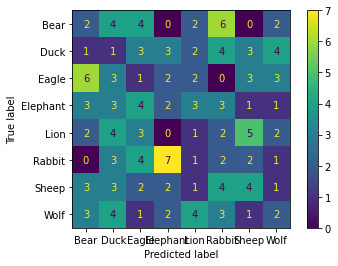

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(SGD, X_test_prepared, y_test)

In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
f1_score = f1_score(y_test, y_pred, average=None)
print(len(f1_score))
df = pd.DataFrame([f1_score],index = ['f1_score(train_test_split sans stratify)']
                  , columns = ['Bear', 'Duck', 'Eagle','Elephant', 'Lion','Rabbit','Sheep','Wolf'])
df

8


,Bear,Duck,Eagle,Elephant,Lion,Rabbit,Sheep,Wolf
f1_score(train_test_split sans stratify),0.1,0.043478,0.047619,0.105263,0.057143,0.090909,0.205128,0.111111


## avec "stratify"

In [57]:
confusion_matrix(y_test, y_pred1)

array([[12,  4,  0,  0,  2,  0,  0,  2],
       [ 0, 18,  1,  1,  0,  1,  0,  0],
       [ 0,  3, 16,  0,  0,  0,  1,  0],
       [ 1,  2,  0, 16,  0,  0,  0,  1],
       [ 1,  0,  0,  0, 14,  3,  0,  1],
       [ 0,  2,  2,  0,  0, 16,  0,  0],
       [ 1,  2,  1,  0,  0,  1, 15,  0],
       [ 0,  0,  0,  0,  1,  0,  1, 18]])

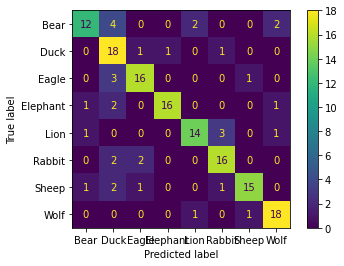

In [58]:
plot_confusion_matrix(SGD1, x_test_prepared, y_test)

In [59]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
f1_score1 = f1_score(y_test, y_pred1, average=None)
print(len(f1_score1))
df1 = pd.DataFrame([f1_score1],index = ['f1_score (train_test_split avec stratify)']
                   , columns = ['Bear', 'Duck', 'Eagle','Elephant', 'Lion','Rabbit','Sheep','Wolf'])
df1

8


,Bear,Duck,Eagle,Elephant,Lion,Rabbit,Sheep,Wolf
f1_score (train_test_split avec stratify),0.685714,0.692308,0.8,0.864865,0.777778,0.780488,0.810811,0.857143


In [60]:
DF = pd.concat([df,df1])
DF

,Bear,Duck,Eagle,Elephant,Lion,Rabbit,Sheep,Wolf
f1_score(train_test_split sans stratify),0.100000,0.043478,0.047619,0.105263,0.057143,0.090909,0.205128,0.111111
f1_score (train_test_split avec stratify),0.685714,0.692308,0.800000,0.864865,0.777778,0.780488,0.810811,0.857143


# 11. Mettre en place un pipeline qui pré-traite les données (RGB2GrayTransformer(),HogTransformer(), StandardScaler()), ​ entraîne le modèle et nous permet de modifierles paramètres plus facilement.

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

arg1 = "SGD"
arg2 = SGDClassifier(max_iter=1000, random_state=42, tol=1e-3)

pipe_pre_traitement = Pipeline([('RGB', RGB2GrayTransformer())
                            , ('Hog',HogTransformer(pixels_per_cell=(ppc, ppc), cells_per_block=(2,2), orientations=9, block_norm='L2-Hys'))
                            , ('scaler',StandardScaler())
                            , (arg1,arg2)])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, stratify = y, random_state=42)
pipe_pre_traitement.fit(x_train, y_train)
#calcul y_pred
y_pred = pipe_pre_traitement.predict(x_test)
#calcul metrics
score = pipe_pre_traitement.score(x_test, y_test)
print("score =", score)

score = 0.79375


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


#choisir le model et le preprocessing
pipe0 = Pipeline([('RGB', RGB2GrayTransformer()), ('Hog',HogTransformer(pixels_per_cell=(ppc, ppc), cells_per_block=(2,2), orientations=9, 
        block_norm='L2-Hys')), ('scaler',StandardScaler()), ('SGD',SGDClassifier(max_iter=1000, random_state=42, tol=1e-3))])
pipe1 = Pipeline([('RGB', RGB2GrayTransformer()), ('Hog',HogTransformer(pixels_per_cell=(ppc, ppc), cells_per_block=(2,2), orientations=9, 
        block_norm='L2-Hys')), ('scaler',StandardScaler()), ('SVM',SVC())])
pipe2 = Pipeline([('RGB', RGB2GrayTransformer()), ('Hog',HogTransformer(pixels_per_cell=(ppc, ppc), cells_per_block=(2,2), orientations=9, 
        block_norm='L2-Hys')), ('scaler',StandardScaler()), ('NB',GaussianNB())])

pipes = [pipe0, pipe1, pipe2]

def pipe_models(X, y):
    ar = []
    f1 = []
    #fractionner les données
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, stratify = y, random_state=42)
    for pipe in pipes:
        pipe.fit(x_train, y_train)
        
        #calcul y_pred
        y_pred = pipe.predict(x_test)
        
        #matrice de confusion
        print("matrice de confusion {}): \n".format(pipe),plot_confusion_matrix(pipe, x_test, y_test))
        print("-"*50)
        
        #calcul metrics
        score_test = pipe.score(x_test, y_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        resultats = [[score_test,accuracy,precision]]
        ar.extend(resultats)
        #f1_score = f1_score(y_test, y_pred, average=None)
        #f1.append(f1_score)
        #df_f1_score = pd.DataFrame(f1, index = ['{}'.format(pipe)],columns = ['Bear', 'Duck', 'Eagle','Elephant', 'Lion','Rabbit','Sheep','Wolf'])
        #print(df_f1_score)
        
    #creer le dataframe pour afficher un tableau    
    arr = np.array(ar)
    #print("arr",arr)
    DF = pd.DataFrame(arr, index = ['SGD','SVM','ND'],
                columns=['score_test','accuracy','precision'])#,'f1_score_Bear','f1_score_Duck', 'f1_score_Eagle','f1_score_Elephant'
                         #, 'f1_score_Lion','f1_score_Rabbit','f1_score_Sheep','f1_score_Wolf'])
    return DF#, df_f1_score

matrice de confusion Pipeline(steps=[('RGB', RGB2GrayTransformer()),
                ('Hog', HogTransformer(cells_per_block=(2, 2))),
                ('scaler', StandardScaler()),
                ('SGD', SGDClassifier(random_state=42))])): 
--------------------------------------------------
matrice de confusion Pipeline(steps=[('RGB', RGB2GrayTransformer()),
                ('Hog', HogTransformer(cells_per_block=(2, 2))),
                ('scaler', StandardScaler()), ('SVM', SVC())])): 
--------------------------------------------------
matrice de confusion Pipeline(steps=[('RGB', RGB2GrayTransformer()),
                ('Hog', HogTransformer(cells_per_block=(2, 2))),
                ('scaler', StandardScaler()), ('NB', GaussianNB())])): 
--------------------------------------------------


,score_test,accuracy,precision
SGD,0.79375,0.79375,0.816931
SVM,0.84375,0.84375,0.851138
ND,0.80000,0.80000,0.822268


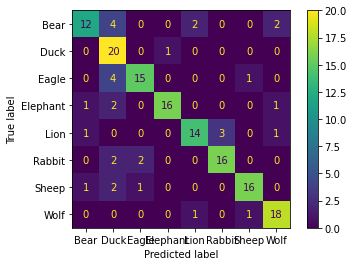

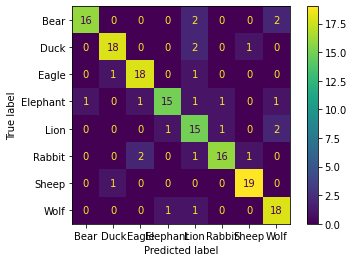

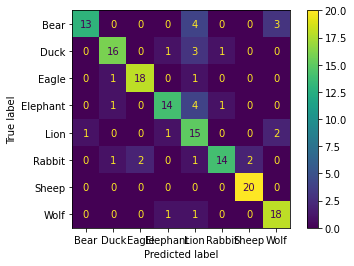

In [63]:
pipe_models(X, y)

On remarque que le meilleur model cest le SVM

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

arg1 = "SVM"
arg2 = SVC()

pipe_pre_traitement = Pipeline([('RGB', RGB2GrayTransformer())
                            , ('Hog',HogTransformer(pixels_per_cell=(ppc, ppc), cells_per_block=(2,2), orientations=9, block_norm='L2-Hys'))
                            , ('scaler',StandardScaler())
                            , (arg1,arg2)])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, stratify = y, random_state=42)
pipe_pre_traitement.fit(x_train, y_train)
#calcul y_pred
y_pred = pipe_pre_traitement.predict(x_test)
#calcul metrics
score = pipe_pre_traitement.score(x_test, y_test)
print("score =", score)

score = 0.84375


# 12. Pour cela, définir une grille de paramètres (param_grid = [{...}]).

In [63]:
parameters_hog = [{'Hog__orientations': [8,9],'Hog__pixels_per_cell':[(2,2),(3,3)],'Hog__cells_per_block':[(8,8),(10,10),(12,12)]}
                  ,{'Hog__orientations': [8],'Hog__pixels_per_cell':[(3,3)],'Hog__cells_per_block':[(8,8)]
                    , 'classify':[SVC(kernel='linear')]}]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, stratify = y, random_state=42)

parameters_hog = [{'Hog__orientations': [8,9],'Hog__pixels_per_cell':[(2,2),(3,3)],'Hog__cells_per_block':[(8,8),(10,10),(12,12)]}
                  ,{'Hog__orientations': [8],'Hog__pixels_per_cell':[(3,3)],'Hog__cells_per_block':[(8,8)]
                    , 'classify':[SVC(kernel='linear')]}]
arg1 = "SVM"
arg2 = SVC()
pipe_pre_traitement = Pipeline([('RGB', RGB2GrayTransformer())
                            , ('Hog',HogTransformer(pixels_per_cell=(ppc, ppc), cells_per_block=(2,2), orientations=9, block_norm='L2-Hys'))
                            , ('scaler',StandardScaler())
                            , (arg1,arg2)])

model_grid_hog = GridSearchCV(pipe_pre_traitement, parameters_hog, cv=3, n_jobs=-1, scoring='accuracy', verbose=1, return_train_score=True)

model_grid_hog.fit(x_train, y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [192]:
from sklearn.pipeline import Pipeline
from sklearn import svm
 
HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
print('Percentage correct: ', 100*np.sum(clf.predict(X_test) == y_test)/len(y_test))


Percentage correct:  8.75


In [193]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {
        'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12)]
    },
    {
        'hogify__orientations': [8],
         'hogify__cells_per_block': [(3, 3)],
         'hogify__pixels_per_cell': [(8, 8)],
         'classify': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear')
         ]
    }
]

In [194]:
grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  1.5min finished


In [195]:
print('Best score = ',grid_res.best_score_)
print('Best parametres = ',grid_res.best_params_)

Best score =  0.13654885286562138
Best parametres =  {'hogify__cells_per_block': (3, 3), 'hogify__orientations': 8, 'hogify__pixels_per_cell': (8, 8)}


In [201]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class RGB2GrayTransformer(TransformerMixin, BaseEstimator):
#     def __init__(self):
#         pass
    
#     def fit(self, X, y=None):
#         return self
        
#     def transform(self, X, y=None):
#         for image in X :
#             image_transform = np.array([[color.rgb2gray(image)]])
#         return image_transform

In [199]:
# class HogTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self,y=None,pixels_per_cell=(16,16), cells_per_block=(2,2),orientations=9,block_norm='L2',multichannel=True,visualize=True):
#         self.y = y
#         self.pixels_per_cell = pixels_per_cell
#         self.cells_per_block = cells_per_block
#         self.orientations = orientations
#         self.visualize = visualize
#         self.block_norm = block_norm
#         self.multichannel = multichannel
        
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X, y=None):
#         for img in X:
#             HOG = hog(img
#                       , pixels_per_cell=self.pixels_per_cell
#                       , cells_per_block=self.cells_per_block
#                       , orientations=self.orientations
#                      , block_norm=self.block_norm
#                      , multichannel=self.multichannel
#                      , visualize=self.visualize)
#         return HOG
# #         try: # parallel
# #             return np.array([HOG(img) for img in X])
# #         except:
# #             return np.array([HOG(img) for img in X])

In [202]:
# class HogTransformer(BaseEstimator, TransformerMixin):
#     """
#     Expects an array of 2d arrays (1 channel images)
#     Calculates hog features for each img
#     """
 
#     def __init__(self, y=None, orientations=9,
#                  pixels_per_cell=(8, 8),
#                  cells_per_block=(3, 3), block_norm='L2-Hys'):
#         self.y = y
#         self.orientations = orientations
#         self.pixels_per_cell = pixels_per_cell
#         self.cells_per_block = cells_per_block
#         self.block_norm = block_norm
 
#     def fit(self, X, y=None):
#         return self
 
#     def transform(self, X, y=None):
 
#         def local_hog(X):
#             return hog(X,
#                        orientations=self.orientations,
#                        pixels_per_cell=self.pixels_per_cell,
#                        cells_per_block=self.cells_per_block,
#                        block_norm=self.block_norm)
 
#         try: # parallel
#             return np.array([local_hog(img) for img in X])
#         except:
#             return np.array([local_hog(img) for img in X])

In [ ]:
#faire la prediction avec 2 classe